In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib
import logging
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Agregar el directorio raíz del proyecto al path de Python
project_root = str(Path().absolute().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

# Importar nuestros módulos
from src.data.preprocessing.text_preprocessing import TextPreprocessor
from src.models.traditional.model_training import SentimentClassifier
from src.visualization.model_evaluation import plot_confusion_matrix, plot_class_distribution, plot_model_comparison

# Configurar logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

Dimensiones del dataset: (67992, 14)

Columnas disponibles:
['id', 'name', 'brand', 'categories', 'reviews.id', 'reviews.date', 'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.username', 'text_length', 'sentiment']

Primeras filas:


,id,name,brand,categories,reviews.id,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,text_length,sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,143,positive
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,5.0,great for beginner or experienced person. Boug...,very fast,truman,75,positive
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,131,positive
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,593,positive
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-12 00:00:00+00:00,True,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,613,positive


2025-01-23 11:29:28,890 - src.data.preprocessing.text_preprocessing - INFO - Inicializando TextPreprocessor...
2025-01-23 11:29:29,092 - src.data.preprocessing.text_preprocessing - INFO - TextPreprocessor inicializado correctamente
2025-01-23 11:29:29,092 - __main__ - INFO - Preprocesando textos...


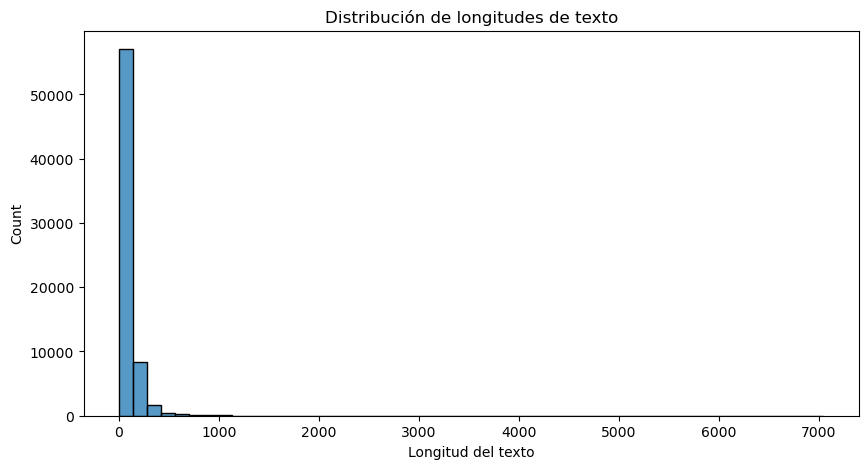

In [2]:
# Cargar datos consolidados
data_file = "../data/processed/consolidated_reviews.csv"
df = pd.read_csv(data_file)

# Mostrar información inicial
print("Dimensiones del dataset:", df.shape)
print("\nColumnas disponibles:")
print(df.columns.tolist())
print("\nPrimeras filas:")
display(df.head())

# Inicializar preprocesador
preprocessor = TextPreprocessor()

# Preprocesar todos los textos
logger.info("Preprocesando textos...")
df['reviews.text_processed'] = df['reviews.text'].apply(preprocessor.preprocess)

# Visualizar distribución de longitudes
text_lengths = df['reviews.text_processed'].str.len()
plt.figure(figsize=(10, 5))
sns.histplot(text_lengths, bins=50)
plt.title('Distribución de longitudes de texto')
plt.xlabel('Longitud del texto')
plt.show()

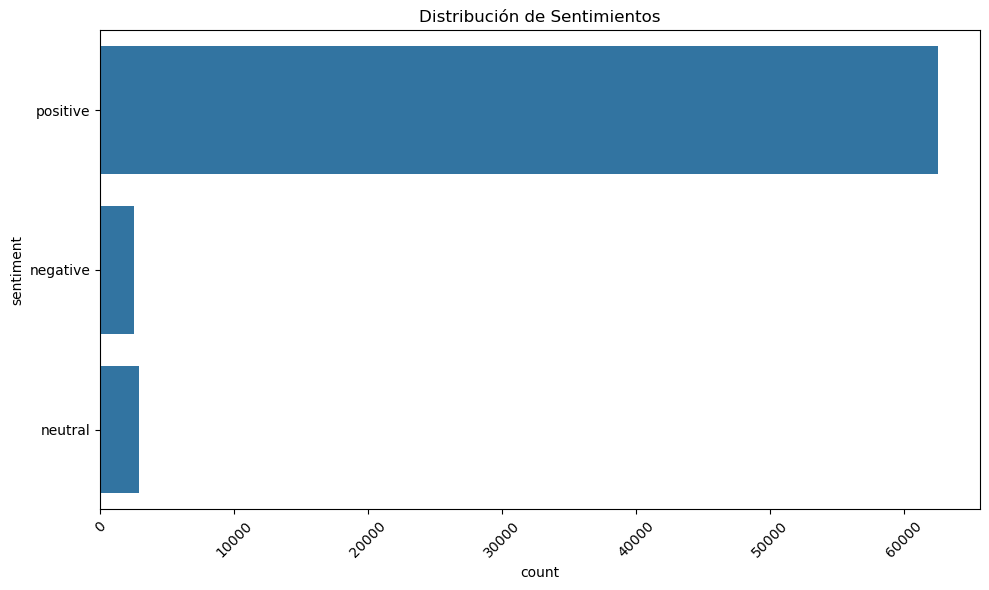


Tamaño de los conjuntos de datos:
Training: 54393 muestras
Testing: 13599 muestras


In [3]:
# Preparar etiquetas
def map_ratings_to_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['reviews.rating'].apply(map_ratings_to_sentiment)

# Visualizar distribución de sentimientos
plot_class_distribution(df['sentiment'], "Distribución de Sentimientos")

# Dividir datos
X = df['reviews.text_processed']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTamaño de los conjuntos de datos:")
print(f"Training: {len(X_train)} muestras")
print(f"Testing: {len(X_test)} muestras")

2025-01-23 11:29:37,411 - src.models.traditional.model_training - INFO - 
Entrenando modelo: naive_bayes
2025-01-23 11:29:37,831 - src.models.traditional.model_training - INFO - Forma de y_true: (13599,)
2025-01-23 11:29:37,831 - src.models.traditional.model_training - INFO - Forma de y_pred: (13599,)
2025-01-23 11:29:37,864 - src.models.traditional.model_training - INFO - Claves en results[naive_bayes]: ['y_true', 'y_pred', 'classification_report', 'confusion_matrix']
2025-01-23 11:29:37,951 - src.models.traditional.model_training - INFO - 
Resultados para naive_bayes:
2025-01-23 11:29:37,951 - src.models.traditional.model_training - INFO - 
Classification Report:
2025-01-23 11:29:37,952 - src.models.traditional.model_training - INFO - 
              precision    recall  f1-score   support

    negative       0.97      0.06      0.12       509
     neutral       1.00      0.01      0.02       580
    positive       0.92      1.00      0.96     12510

    accuracy                      

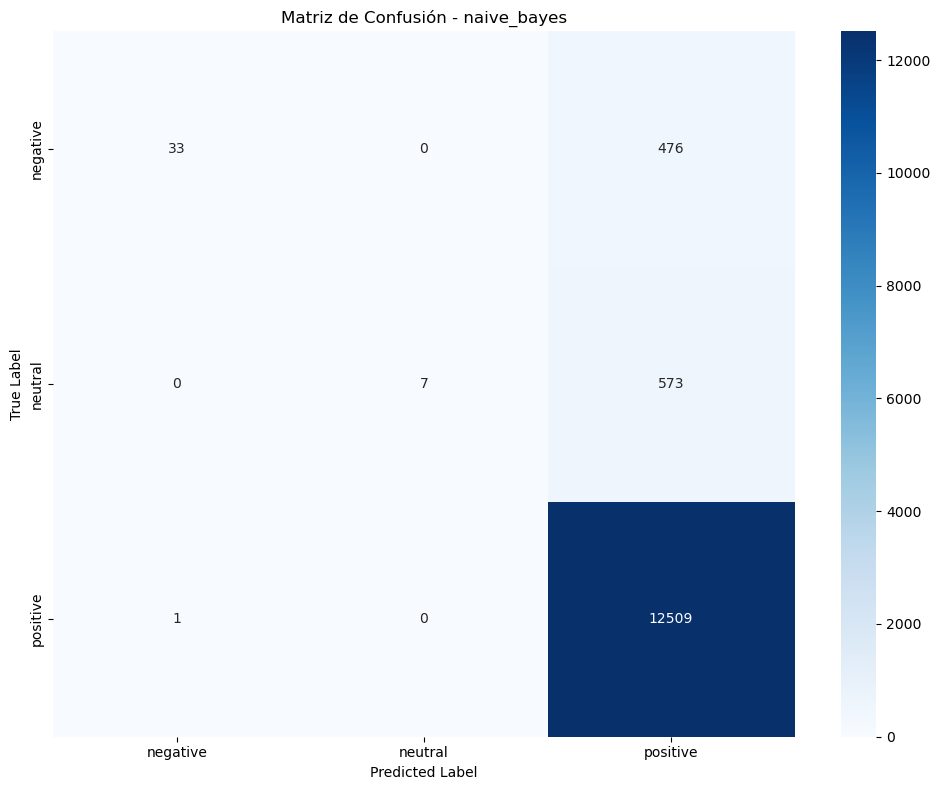

2025-01-23 11:29:39,761 - src.models.traditional.model_training - INFO - 
Validación cruzada (5-fold):
2025-01-23 11:29:39,762 - src.models.traditional.model_training - INFO - Media: 0.921 (+/- 0.000)
2025-01-23 11:29:39,762 - src.models.traditional.model_training - INFO - 
Entrenando modelo: logistic_regression
2025-01-23 11:29:40,577 - src.models.traditional.model_training - INFO - Forma de y_true: (13599,)
2025-01-23 11:29:40,577 - src.models.traditional.model_training - INFO - Forma de y_pred: (13599,)
2025-01-23 11:29:40,700 - src.models.traditional.model_training - INFO - Claves en results[logistic_regression]: ['y_true', 'y_pred', 'classification_report', 'confusion_matrix']
2025-01-23 11:29:40,788 - src.models.traditional.model_training - INFO - 
Resultados para logistic_regression:
2025-01-23 11:29:40,788 - src.models.traditional.model_training - INFO - 
Classification Report:
2025-01-23 11:29:40,789 - src.models.traditional.model_training - INFO - 
              precision    

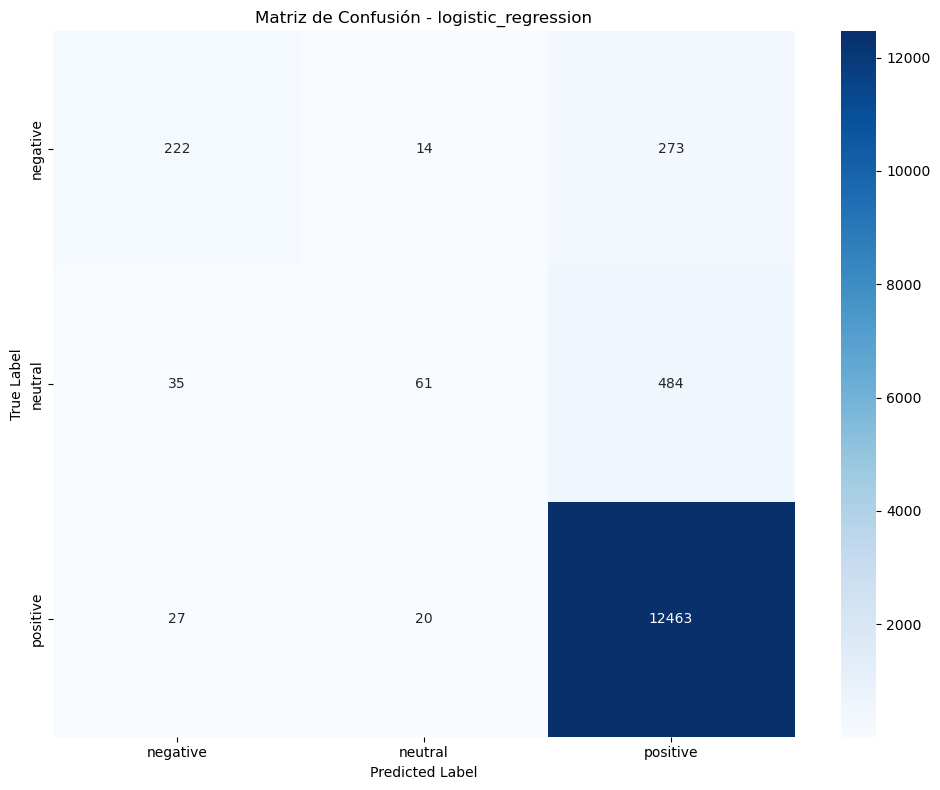

2025-01-23 11:29:44,284 - src.models.traditional.model_training - INFO - 
Validación cruzada (5-fold):
2025-01-23 11:29:44,284 - src.models.traditional.model_training - INFO - Media: 0.935 (+/- 0.002)
2025-01-23 11:29:44,284 - src.models.traditional.model_training - INFO - 
Entrenando modelo: svm
2025-01-23 11:29:45,014 - src.models.traditional.model_training - INFO - Forma de y_true: (13599,)
2025-01-23 11:29:45,014 - src.models.traditional.model_training - INFO - Forma de y_pred: (13599,)
2025-01-23 11:29:45,052 - src.models.traditional.model_training - INFO - Claves en results[svm]: ['y_true', 'y_pred', 'classification_report', 'confusion_matrix']
2025-01-23 11:29:45,139 - src.models.traditional.model_training - INFO - 
Resultados para svm:
2025-01-23 11:29:45,140 - src.models.traditional.model_training - INFO - 
Classification Report:
2025-01-23 11:29:45,140 - src.models.traditional.model_training - INFO - 
              precision    recall  f1-score   support

    negative       0

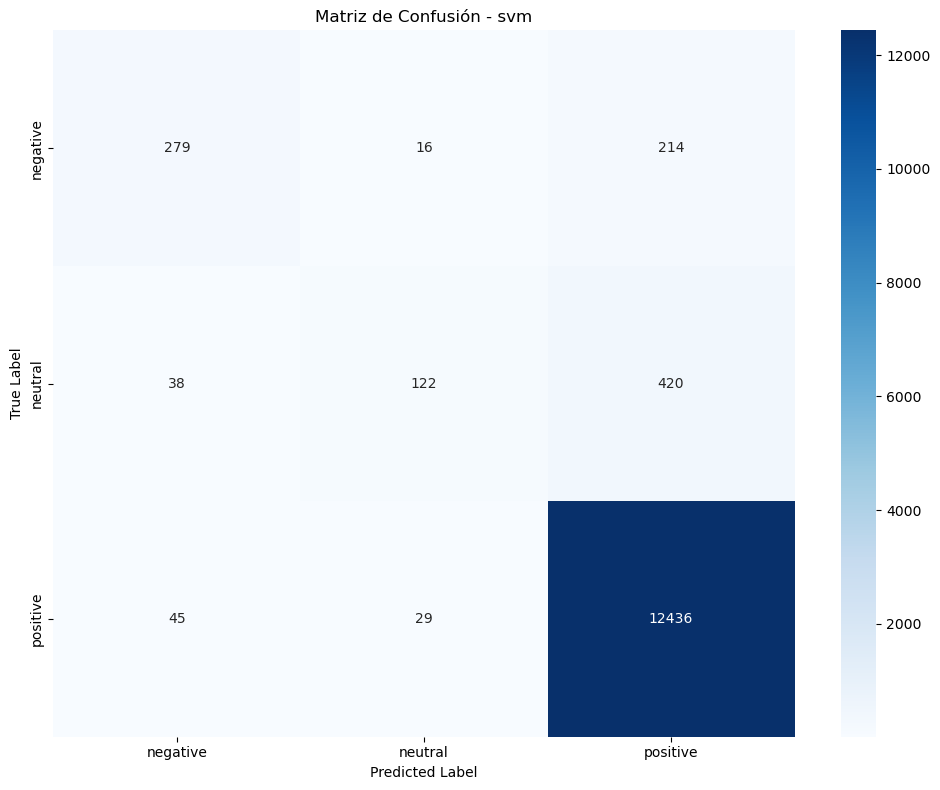

2025-01-23 11:29:48,272 - src.models.traditional.model_training - INFO - 
Validación cruzada (5-fold):
2025-01-23 11:29:48,273 - src.models.traditional.model_training - INFO - Media: 0.941 (+/- 0.002)
2025-01-23 11:29:48,273 - src.models.traditional.model_training - INFO - 
Entrenando modelo: random_forest
2025-01-23 11:30:07,691 - src.models.traditional.model_training - INFO - Forma de y_true: (13599,)
2025-01-23 11:30:07,692 - src.models.traditional.model_training - INFO - Forma de y_pred: (13599,)
2025-01-23 11:30:07,730 - src.models.traditional.model_training - INFO - Claves en results[random_forest]: ['y_true', 'y_pred', 'classification_report', 'confusion_matrix']
2025-01-23 11:30:07,862 - src.models.traditional.model_training - INFO - 
Resultados para random_forest:
2025-01-23 11:30:07,862 - src.models.traditional.model_training - INFO - 
Classification Report:
2025-01-23 11:30:07,863 - src.models.traditional.model_training - INFO - 
              precision    recall  f1-score  

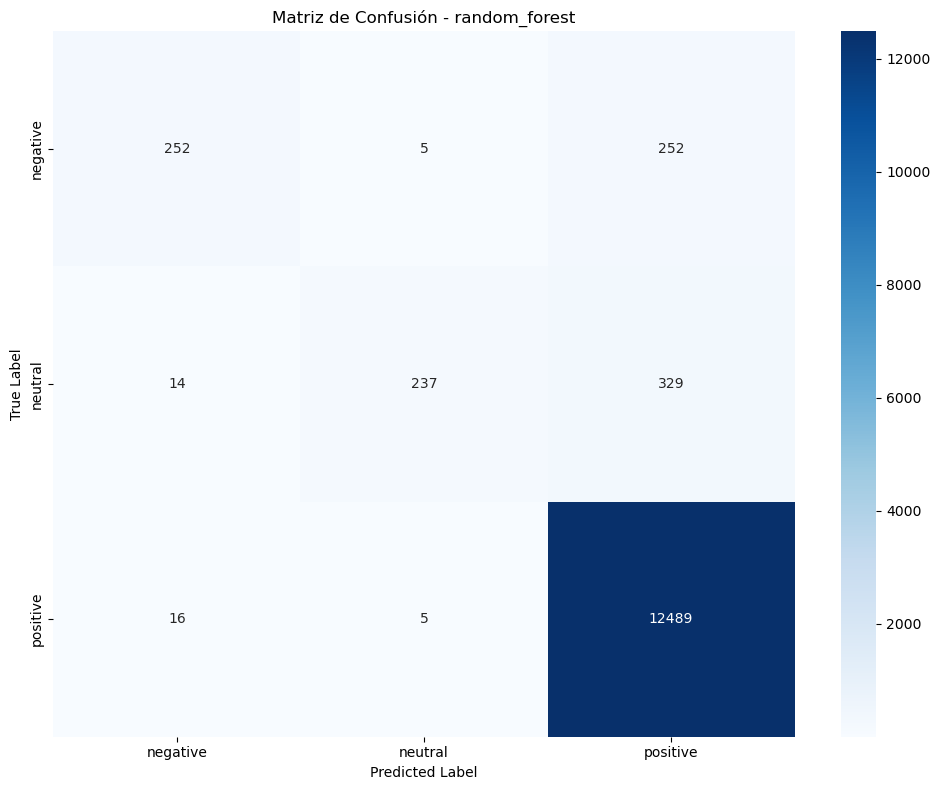

2025-01-23 11:31:21,586 - src.models.traditional.model_training - INFO - 
Validación cruzada (5-fold):
2025-01-23 11:31:21,587 - src.models.traditional.model_training - INFO - Media: 0.951 (+/- 0.002)


In [4]:
# Inicializar y entrenar modelos
classifier = SentimentClassifier()
results = classifier.train_and_evaluate(X_train, X_test, y_train, y_test, "../models/traditional")



In [5]:
# Verificar la estructura de resultados
print("\nEstructura de resultados:")
for model_name, result in results.items():
    print(f"\nModelo: {model_name}")
    print("Claves disponibles:", list(result.keys()))
    if 'y_true' in result:
        print("Tipo de y_true:", type(result['y_true']))
        print("Forma de y_true:", result['y_true'].shape if hasattr(result['y_true'], 'shape') else len(result['y_true']))
    if 'y_pred' in result:
        print("Tipo de y_pred:", type(result['y_pred']))
        print("Forma de y_pred:", result['y_pred'].shape if hasattr(result['y_pred'], 'shape') else len(result['y_pred']))


Estructura de resultados:

Modelo: naive_bayes
Claves disponibles: ['y_true', 'y_pred', 'classification_report', 'confusion_matrix']
Tipo de y_true: <class 'numpy.ndarray'>
Forma de y_true: (13599,)
Tipo de y_pred: <class 'numpy.ndarray'>
Forma de y_pred: (13599,)

Modelo: logistic_regression
Claves disponibles: ['y_true', 'y_pred', 'classification_report', 'confusion_matrix']
Tipo de y_true: <class 'numpy.ndarray'>
Forma de y_true: (13599,)
Tipo de y_pred: <class 'numpy.ndarray'>
Forma de y_pred: (13599,)

Modelo: svm
Claves disponibles: ['y_true', 'y_pred', 'classification_report', 'confusion_matrix']
Tipo de y_true: <class 'numpy.ndarray'>
Forma de y_true: (13599,)
Tipo de y_pred: <class 'numpy.ndarray'>
Forma de y_pred: (13599,)

Modelo: random_forest
Claves disponibles: ['y_true', 'y_pred', 'classification_report', 'confusion_matrix']
Tipo de y_true: <class 'numpy.ndarray'>
Forma de y_true: (13599,)
Tipo de y_pred: <class 'numpy.ndarray'>
Forma de y_pred: (13599,)


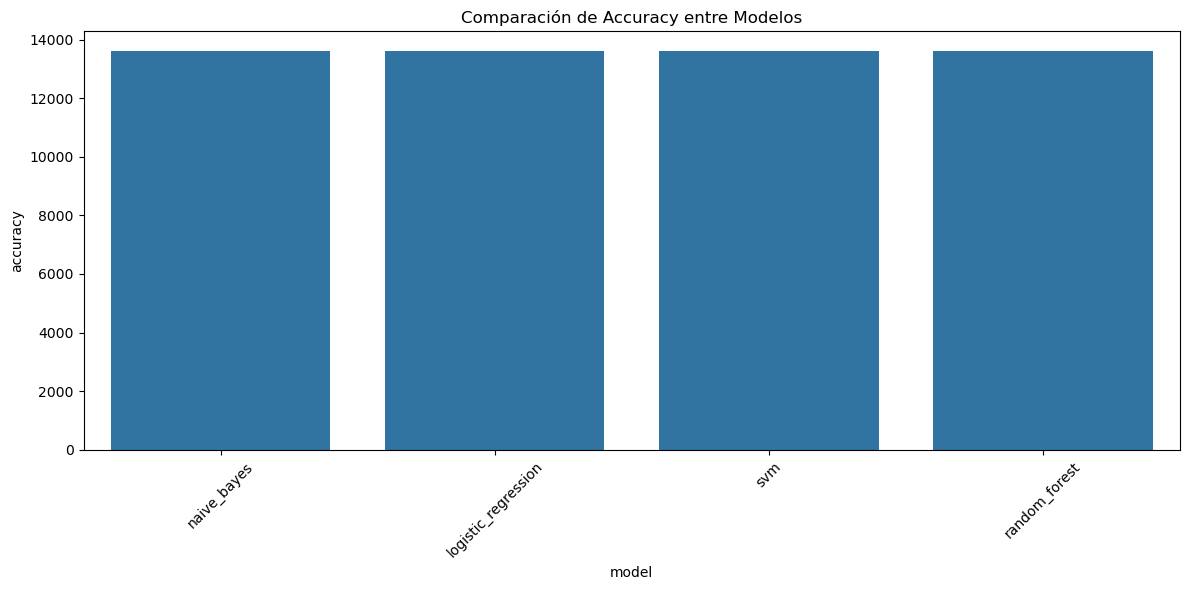


Análisis de errores para naive_bayes:
Total de errores: 1050

Distribución de errores:


Predicted,negative,positive
True,,
negative,0,476
neutral,0,573
positive,1,0


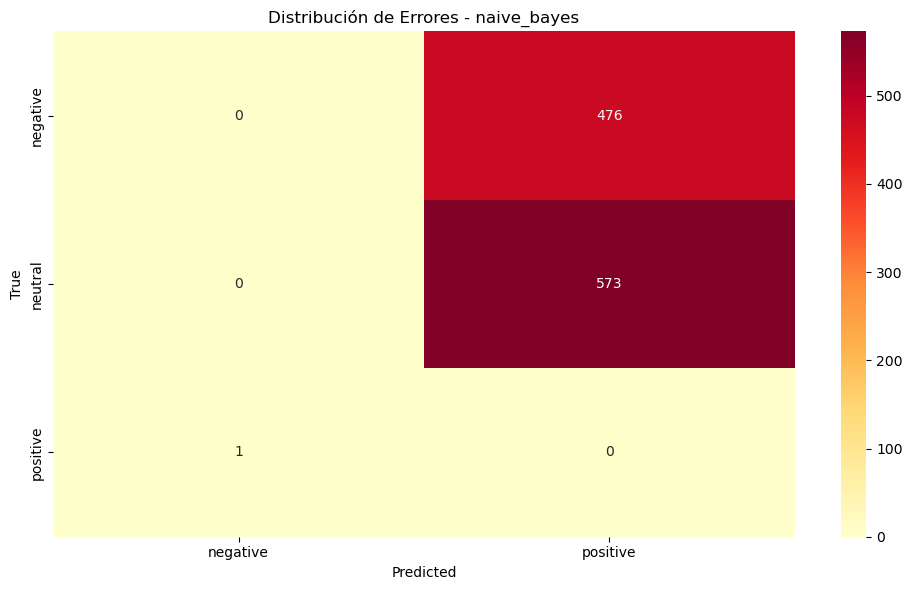


Análisis de errores para logistic_regression:
Total de errores: 853

Distribución de errores:


Predicted,negative,neutral,positive
True,,,
negative,0,14,273
neutral,35,0,484
positive,27,20,0


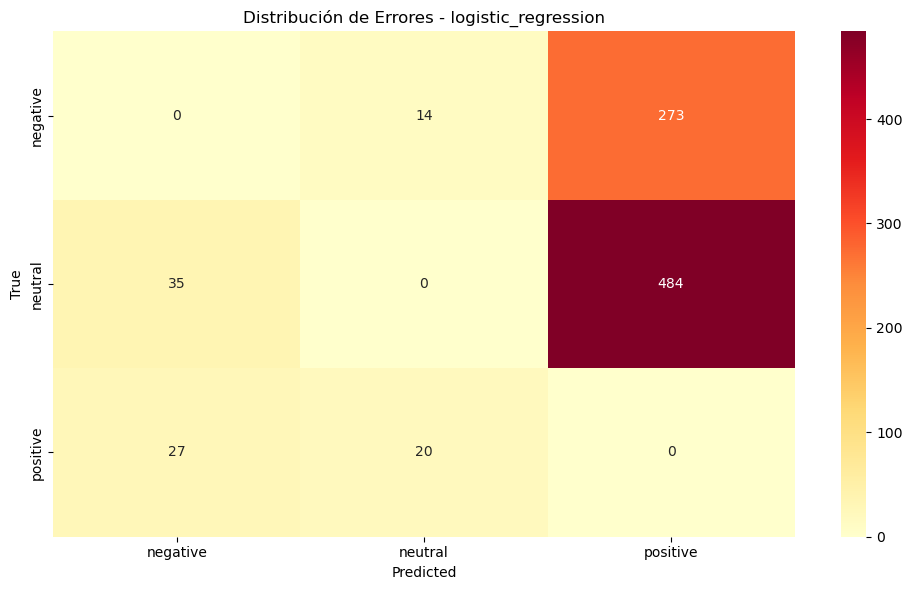


Análisis de errores para svm:
Total de errores: 762

Distribución de errores:


Predicted,negative,neutral,positive
True,,,
negative,0,16,214
neutral,38,0,420
positive,45,29,0


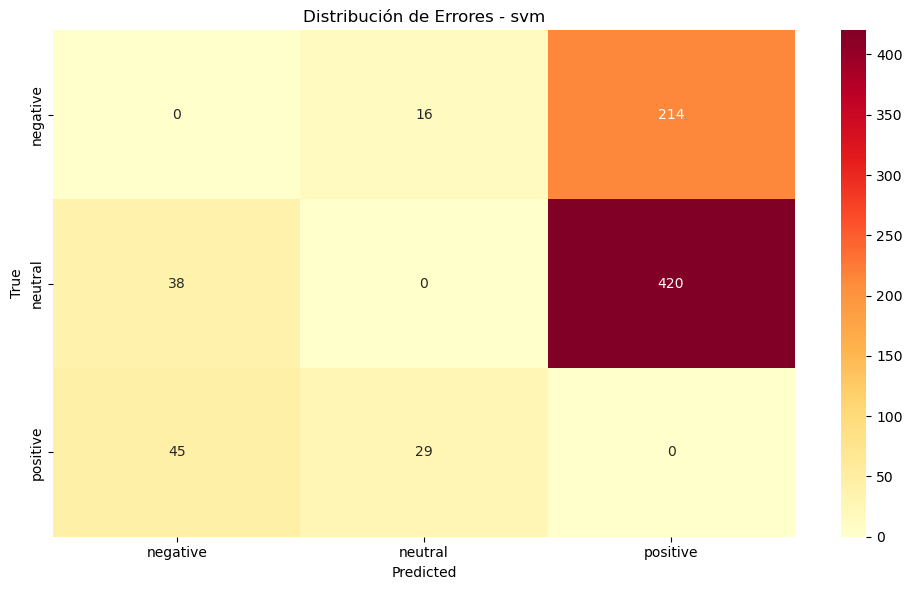


Análisis de errores para random_forest:
Total de errores: 621

Distribución de errores:


Predicted,negative,neutral,positive
True,,,
negative,0,5,252
neutral,14,0,329
positive,16,5,0


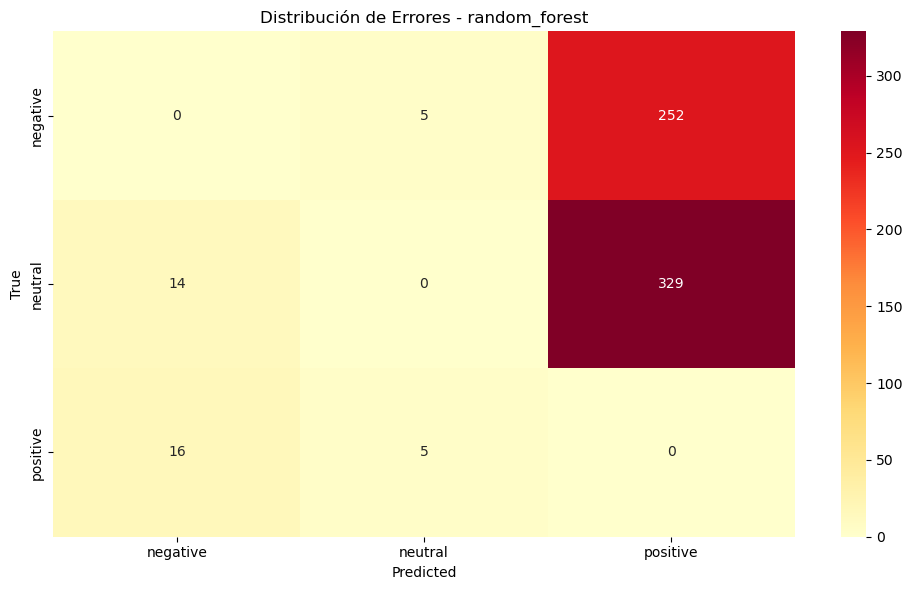

In [6]:

# Visualizar resultados comparativos
plot_model_comparison(results)

# Analizar errores
def analyze_errors(classifier, model_name):
    """Analiza los errores más comunes del modelo."""
    y_true = classifier.results[model_name]['y_true']
    y_pred = classifier.results[model_name]['y_pred']
    
    error_idx = np.where(y_true != y_pred)[0]
    
    print(f"\nAnálisis de errores para {model_name}:")
    print(f"Total de errores: {len(error_idx)}")
    
    errors_df = pd.DataFrame({
        'True': y_true[error_idx],
        'Predicted': y_pred[error_idx]
    })
    
    print("\nDistribución de errores:")
    error_dist = errors_df.groupby(['True', 'Predicted']).size().unstack(fill_value=0)
    display(error_dist)
    
    # Visualizar matriz de errores
    plt.figure(figsize=(10, 6))
    sns.heatmap(error_dist, annot=True, fmt='d', cmap='YlOrRd')
    plt.title(f'Distribución de Errores - {model_name}')
    plt.tight_layout()
    plt.show()

# Analizar errores para cada modelo
for model_name in classifier.models.keys():
    analyze_errors(classifier, model_name)